we will use the CIFAR-10 dataset. https://www.cs.toronto.edu/~kriz/cifar.html

The first thing we need to do is to get the image dataset. We do so with Keras - Keras is now a part of tensorflow https://keras.io/




Now, the data that we need are stored in the respective arrays (x_train, y_train, x_test and y_test). Let us explore the dataset a little.

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


the shape of our input features array is

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


50000 images
32 pixels in height
32 pixels in width
3 pixels in depth (corresponding to Red, Green and Blue)
Let’s see what the shape of the label array is:

In [ ]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


one number (corresponding to the label) for each of out 50000 images.

what does teh computer see before we flatten this image


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


visualize this image of x_train[0] using the matplotlib package:

The %matplotlib inline tells the notebook that you wish for the image to display within the image. plt.imshow is a function that displays the numbered pixel values in x_train[0]to the actual image it represents

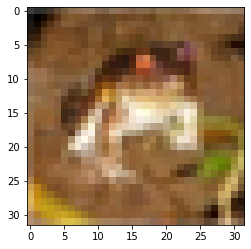

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

its a frog!  or the ender dragon.  
size of the image is 32 * 32 pixels, which is tiny
what is the label of this image is in our dataset:

In [ ]:
print('The label is:', y_train[0])

The label is: [6]


We see that the label is the number ‘6’. The conversion of numbers to the label is alphabetically sorted as follows:
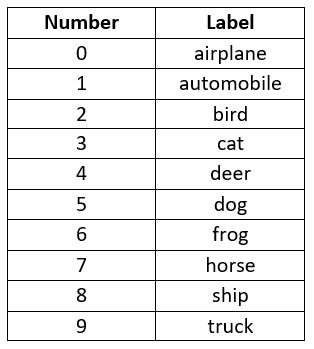

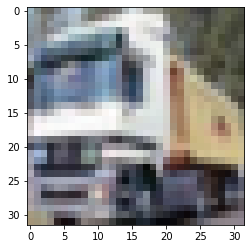

In [ ]:
img = plt.imshow(x_train[1])

we can look at other items in teh picture array. 

In [ ]:
print('The label is:', y_train[1])

The label is: [9]


now we need to train / process the model.  with only two classes, we can interpret the output of the neural network as a probability. That is, if the neural network outputs 0.6, it means it believes it is above our threshold and it is a chair. This doesn’t work in a multi-class setting like this, where the image can belong to one of 10 different classes.

What we really want is the probability of each of the 10 different classes. For that, we need 10 output neurons in our neural network. Since we have 10 output neurons, our labels must match this as well.

To do this, we convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. This is called a one-hot encoding, and the conversion table now looks like this:
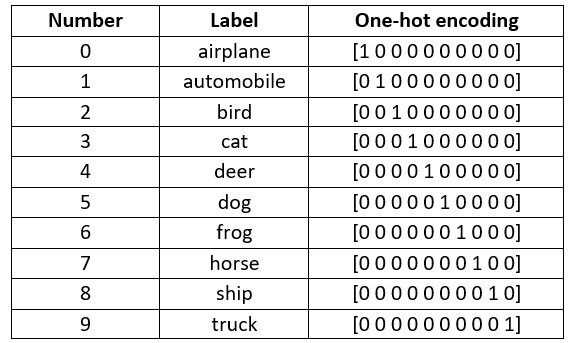

To do this conversion in code, we use Keras again:

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras import utils as np_utils
y_train_one_hot = keras.utils.np_utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.np_utils.to_categorical(y_test, 10)


The line y_train_one_hot = keras.utils.to_categorical(y_train, 10)means that we take the initial array with just the number, y_train, and convert it to the one_hot encodings, y_train_one_hot. The number 10 is required as a parameter as you need to tell the function how many classes there are (10).

Now, let’s say we want to see how the label for our second image (the truck, label: 9) looks like in the one-hot setting:

In [ ]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now that we’ve processed our labels (y), we might also want to process our image (x). A common step we do is to let the values to be between 0 and 1, which will aid in the training of our neural network. Since our pixel values already take the values between 0 and 255, we simply need to divide by 255.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

e divide each cell by 255. If you want, look at the array values of the first training image by running the cell:

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

Now, notice that so far we’ve only had a train set and a test set. Unlike our previous projecr, we will not pre-split our validation set as there is a shortcut for this that we’ll introduce later on. so... no test traihn split method

so far we have just
Downloaded the dataset and visualize the images
Changed the label to one-hot encodings
Scale the image pixel values to take between 0 and 1


For now, we’ll zero-pad our layer such that the output width and height will be the same as the input width and height. This is called ‘same’ padding. For a 3x3 filter, to achieve the same width and height, we’ll have to pad with a border width of 1. We will be applying ‘same’ padding for all the conv layers.
 we will use ReLU activation for all our layers, except for the last layer which is a softmax activation. 

we’ll use Keras sequential model. However, since we have many layers in our model, we will have to specify the sequence. We’ll go through the code line-by-line. First, we import some of the code we need:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Then, we call an ‘empty’ sequential model:

In [ ]:
model = Sequential()

We’ll add to this empty model one layer at a time. The first layer (if you recall from our diagram) is a conv layer with filter size 3x3, stride size 1 (in both dimensions), and depth 32. The padding is the ‘same’ and the activation is ‘relu’ (these two settings will apply to all layers in our CNN). With all that, let’s specify our first layer in code

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

What this is doing is to add this layer to our empty sequential model using the function model.add(). The first number 32 refers to the depth. The next pair of numbers (3,3) refer to the filter width and size. Then, we specify activation which is ‘relu’ and padding which is ‘same’. Notice that we did not specify stride. This is because stride=1 is a default setting, and unless we want to change this setting, we need not specify it.

If you recall, we also need to specify an input size for our first layer; subsequent layers does not have this specification since they can infer the input size from the output size of the previous layer.

Our second layer looks like this in code (we don’t need to specify the input size):

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

The next layer is a max pooling layer with pool size 2 x 2 and stride 2 (in both dimensions). The default for a max pooling layer stride is the pool size, so we don’t have to specify the stride:

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Lastly, we add a dropout layer with probability 0.25 of dropout so as to prevent overfitting:

In [ ]:
model.add(Dropout(0.25))

And there we have it, our first four layers in code. The next four layers look really similar (except the depth of the conv layer is 64 instead of 32):

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

 our neurons are spatially arranged in a cube-like format rather than in just one row. To make this cube-like format of neurons into one row, we have to first flatten it. We do so by adding a Flatten layer:

In [ ]:
model.add(Flatten())

Now, we have a dense (FC) layer of 512 neurons with relu activation:


In [ ]:
model.add(Dense(512, activation='relu'))

We add another dropout of probability 0.5:

In [ ]:
model.add(Dropout(0.5))

And lastly, we have a dense (FC) layer with 10 neurons and softmax activation:

In [ ]:
model.add(Dense(10, activation='softmax'))

And we’re done with specifying our architecture. let's look at a summary of the full architecture.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

We’ll compile the model with our settings below:

The loss function we use is called categorical cross entropy, which is applicable for a classification problem of many classes. The optimizer we use here is Adam. We haven’t gone through the intuition of Adam yet, but know that Adam is simply a type of stochastic gradient descent (with a few modifications) so that it trains better. Lastly, we want to track the accuracy of our model.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Time to train.  Whoo Whoo

In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 249s 199ms/step - loss: 1.5817 - accuracy: 0.4234 - val_loss: 1.1881 - val_accuracy: 0.5729
Epoch 2/20
1250/1250 [==============================] - 252s 202ms/step - loss: 1.1874 - accuracy: 0.5759 - val_loss: 1.0338 - val_accuracy: 0.6345
Epoch 3/20
1250/1250 [==============================] - 244s 195ms/step - loss: 1.0294 - accuracy: 0.6347 - val_loss: 0.9041 - val_accuracy: 0.6849
Epoch 4/20
1250/1250 [==============================] - 245s 196ms/step - loss: 0.9180 - accuracy: 0.6785 - val_loss: 0.8579 - val_accuracy: 0.7015
Epoch 5/20
1250/1250 [==============================] - 245s 196ms/step - loss: 0.8430 - accuracy: 0.7031 - val_loss: 0.7996 - val_accuracy: 0.7199
Epoch 6/20
1250/1250 [==============================] - 246s 197ms/step - loss: 0.7784 - accuracy: 0.7273 - val_loss: 0.7461 - val_accuracy: 0.7401
Epoch 7/20
1250/1250 [==============================] - 246s 197ms/step - loss: 0.7296 - accuracy: 0.7425 - val_

We train our model with batch size 32 and 20 epochs. We use the setting validation_split=0.2 instead of validation_data. With this shortcut, we did not need to split our dataset into a train and validation set at the start! Instead, we simply specify how much of our dataset will be used as a validation set. In this case, 20% of our dataset is used as a validation set.

how did the training go?

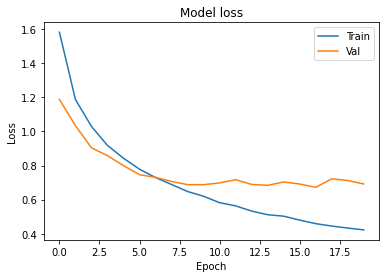

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

check accuracy

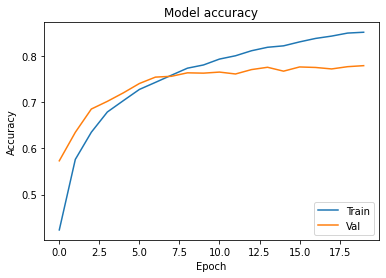

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

my model is 77% accurate

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 14s 46ms/step - loss: 0.7367 - accuracy: 0.7706


0.7706000208854675

You can save your model for later if you lile it.  

In [ ]:
#model.save('my_cifar10_model.h5')

from keras.models import load_model


model = load_model('my_cifar10_model.h5')


to use the model

 let’s try it on our own image

In [ ]:
my_image = plt.imread("cat.jpg")

The first thing we have to do is to resize the image of our cat so that we can fit it into our model (input size of 32 * 32 * 3). Instead of coding a resize function ourselves, let’s download a package called ‘scikit-image’ which would help us with that function.

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

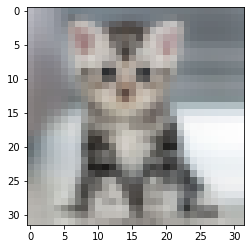

In [ ]:
img = plt.imshow(my_image_resized)

Note that the resized image has pixel values already scaled between 0 and 1, so we need not apply the pre-processing steps that we previously did for our training image. And now, we see what our trained model will output when given an image of our cat, using the code of model.predict:

In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

model.predict expects a 4-D array instead of a 3-D array (with the missing dimension being the number of training examples). This is consistent with the training set and test set that we had previously. Thus, the np.array(...) code is there to change our current array of my_image_resized into a 4-D array before applying the model.predict function.

The outputs of the code above are the 10 output neurons corresponding to a probability distribution over the classes. 

In [ ]:
probabilities

array([[1.4409836e-03, 9.9366241e-07, 9.9618128e-03, 2.1122564e-01,
        7.9886671e-03, 6.2392396e-01, 3.7536230e-03, 1.4153144e-01,
        1.5532984e-04, 1.7507016e-05]], dtype=float32)

make our model predictions easier to read.

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.62392396
Second most likely class: cat -- Probability: 0.21122564
Third most likely class: horse -- Probability: 0.14153144
Fourth most likely class: bird -- Probability: 0.009961813
Fifth most likely class: deer -- Probability: 0.007988667


Well, my model thinks that it is a dog.  I would have to retrain this.  

I though tI would train a train.  And i remembered that there is no train in the datas set.  so what will we get?

In [ ]:
my_image = plt.imread("train.jpg")

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

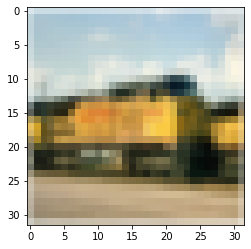

In [ ]:
img = plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [ ]:
probabilities

array([[6.4997665e-05, 3.6653789e-04, 1.2282229e-09, 6.3425198e-10,
        2.1722539e-11, 1.9366989e-11, 1.6285255e-12, 1.3879309e-09,
        4.1619869e-04, 9.9915230e-01]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: truck -- Probability: 0.9991523
Second most likely class: ship -- Probability: 0.0004161987
Third most likely class: automobile -- Probability: 0.0003665379
Fourth most likely class: airplane -- Probability: 6.4997665e-05
Fifth most likely class: horse -- Probability: 1.3879309e-09
Most likely class: truck -- Probability: 0.9991523
Second most likely class: ship -- Probability: 0.0004161987
Third most likely class: automobile -- Probability: 0.0003665379
Fourth most likely class: airplane -- Probability: 6.4997665e-05
Fifth most likely class: horse -- Probability: 1.3879309e-09


close enough.  Give me my $100,000 